In [397]:
import numpy as np
import math
import matplotlib.pyplot as plt

State_space: the inventories number of the shoe 

# Markov

In [375]:
I = 2200
c = 220
N = int(I/c) + 1

beta = 0.97 #discount factor

In [405]:
def create_matrix(total_states,p):
    markov_chain = np.zeros((total_states,total_states))
    for i in range(total_states - 1):
        markov_chain[i][i+1] = p
        markov_chain[i][i] = 1 - p
    markov_chain[total_states - 1][total_states - 1] = 1
    return markov_chain

def mkov_chain_simu(mkov,start,iteration = 100):
    result = []
    decision = []
    states_number = len(mkov) - 1
    x_i = start #suppose state 1 is 0th row
    i = 0
    result.append(states_number - x_i)
    while(i < iteration):
        new_state = np.random.choice(np.arange(len(mkov)),p = mkov[x_i])
        if new_state == x_i:
            decision.append(0)
        else:
            decision.append(1)
        x_i = new_state
        result.append(states_number-x_i)
        i += 1
    return result,decision

In [377]:
#analytically solve initial model

In [457]:
def exponential(lam,x):
    return lam*math.e**(-lam*x)

def analytical_solution(price,N,beta):
    p = exponential(1,(price - c)/100)
    R = [p*price]*(N-1)
    R.append(0)
    mkov = create_matrix(N,p)
    I = np.identity(N)
    V = np.linalg.inv(I - beta*mkov) @ R
    return V

def mkov_chain_simu_probchange(price,states_number,prob_change,iteration = 100):
    prob_initial = exponential(1,(price - c)/100)
    result = []
    decision = []
    mkov = create_matrix(states_number,prob_initial)
    p = prob_initial
    x_i = 0 #suppose state 1 is 0th row
    i = 0
    result.append(states_number - 1 - x_i)
    while(i < iteration):
        pr_change = np.random.choice([1.01,0.99,1],p = prob_change)
        p = min(pr_change*p,1)
        
        mkov = create_matrix(states_number,p)
        new_state = np.random.choice(np.arange(len(mkov)),p = mkov[x_i])
        
        if new_state == x_i:
            decision.append(0)
        else:
            decision.append(1)
        x_i = new_state
        result.append(states_number- 1 - x_i)
        i += 1
    return result,decision


In [379]:
result = []
for price in range(220,441):
    V = analytical_solution(price,N,beta)
    V = V - np.arange(10,-1,-1)*220
    result.append(V)

In [380]:
x,y = np.where(np.array(result) == np.amax(np.array(result)))

In [394]:
(x[0]+220,N-1-y[0])

(365, 4)

In [395]:
np.amax(np.array(result))

234.9736910532547

Text(0.5, 1.0, 'price vs profit')

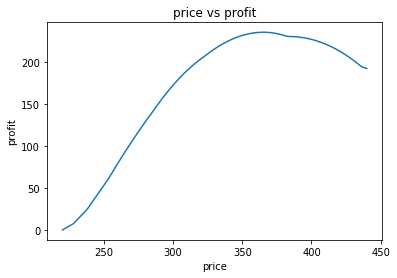

In [403]:
best = []
for i in range(len(result)):
    best.append( np.amax(np.array(result[i])))
    
plt.plot(np.arange(220,441),best)
plt.xlabel('price')
plt.ylabel('profit')
plt.title('price vs profit')


Text(0.5, 1.0, 'inventory vs profit, price = 365')

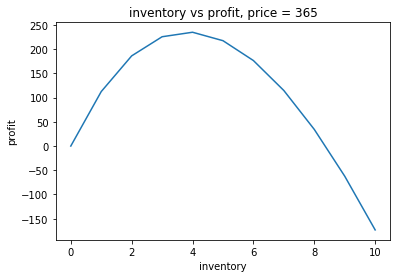

In [404]:
plt.plot(np.arange(10,-1,-1),result[365-220])
plt.xlabel('inventory')
plt.ylabel('profit')
plt.title('inventory vs profit, price = 365')


# Non-Markov

In [430]:
prob_change = [0.5,0.1,0.4]


In [485]:
def simulation_average(price,inventory,beta,iteration = 100):
    prob_change = [0.5,0.1,0.4]
    profits = []
    for m in range(iteration):
        rt,decision = mkov_chain_simu_probchange(price,inventory,prob_change)
        payback = 0
        for i in range(len(decision)):
            payback += (beta**i)*price*decision[i]
        profits.append(payback)
    
    return sum(profits)/len(profits) - (inventory-1)*220

In [486]:
simulation_average(365,4,beta)

248.00303154801452

In [487]:
from tqdm import tqdm

In [488]:
non_mar_result = np.zeros((23,11))
price = 365
for price in range(0,23):
    for inventory in range(11):
        non_mar_result[price][inventory] = simulation_average((22+price)*10,inventory+1,beta)


In [490]:
x,y = np.where(non_mar_result == np.amax(non_mar_result))

In [492]:
((x[0]+22)*10, y[0])

(390, 4)

In [493]:
np.amax(non_mar_result)

263.60104252045926

Text(0.5, 1.0, 'price vs profit')

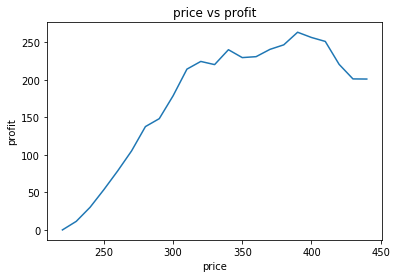

In [495]:
best = []
for i in range(len(non_mar_result)):
    best.append( np.amax(np.array(non_mar_result[i])))
    
plt.plot((np.arange(0,23)+22)*10,best)
plt.xlabel('price')
plt.ylabel('profit')
plt.title('price vs profit')



Text(0.5, 1.0, 'inventory vs profit, price = 390')

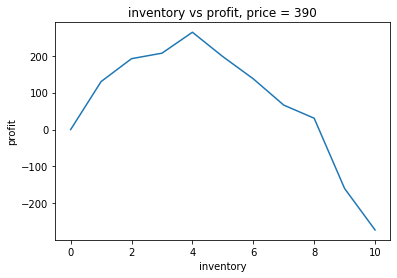

In [497]:
plt.plot(np.arange(11),non_mar_result[x[0]])
plt.xlabel('inventory')
plt.ylabel('profit')
plt.title('inventory vs profit, price = 390')

